<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Bar_Magnet_Field_Lines_MagPyLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 kB 2.2 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/magpylib/_src/obj_classes/class_BaseExcitations.py:396: MagpylibDeprecationWarning: Cuboid(id=135401694643984) received a very low magnetization. In Magpylib v5 magnetization is given in units of A/m, while polarization is given in units of T.
  self._magnetization_low_warning()


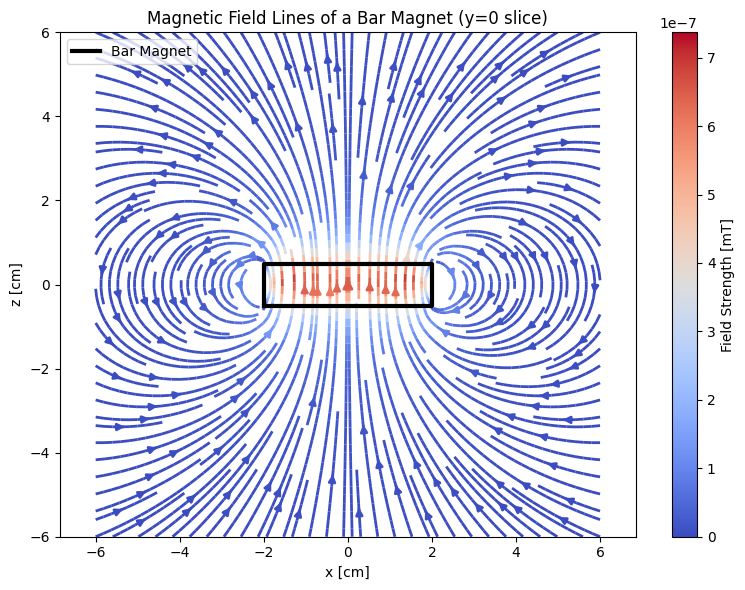

In [1]:
# Install Magpylib in Google Colab if needed
!pip install magpylib --quiet

import numpy as np
import matplotlib.pyplot as plt
from magpylib import Collection
from magpylib.magnet import Cuboid

# 1. Define the bar magnet: (length=4, width=1, height=1) in centimeters, magnetized along z-axis
magnet = Cuboid(
    magnetization=(0, 0, 1),  # [mT] Magnetized along the z-axis
    dimension=(4, 1, 1)       # [cm] Length (x), Width (y), Height (z)
)

# 2. Generate a grid of points (2D slice for clear plotting)
x = np.linspace(-6, 6, 25)
z = np.linspace(-6, 6, 25)
X, Z = np.meshgrid(x, z)
Y = np.zeros_like(X)  # y=0 plane

positions = np.stack([X, Y, Z], axis=-1).reshape(-1,3)

# 3. Compute the magnetic field at each point
B = magnet.getB(positions)  # mT
Bx = B[:,0].reshape(X.shape)
Bz = B[:,2].reshape(Z.shape)

# 4. Plot the vector field with streamlines
plt.figure(figsize=(8,6))
plt.title('Magnetic Field Lines of a Bar Magnet (y=0 slice)')
plt.xlabel('x [cm]')
plt.ylabel('z [cm]')
plt.streamplot(
    X, Z, Bx, Bz,
    color=np.hypot(Bx, Bz),
    linewidth=2, cmap='coolwarm', density=2
)
# Draw the outline of the magnet for reference
magnet_outline = [
    [-2, -0.5], [2, -0.5], [2, 0.5], [-2, 0.5], [-2, -0.5]
]
magnet_outline = np.array(magnet_outline)
plt.plot(magnet_outline[:,0], magnet_outline[:,1], 'k-', lw=3, label='Bar Magnet')

plt.legend()
plt.colorbar(label='Field Strength [mT]')
plt.axis('equal')
plt.tight_layout()
plt.show()
